<a href="https://colab.research.google.com/github/guilleib227/Big-Data-Colab-UCN-/blob/main/Arbol%20de%20decision%20y%20knn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Taller Recuperativo - K-NN, Árbol de decisión

<h1 style="color:red;">Note: Si usted cierra este archivo en cualquier momento, usted debe correr todas las celdas otra vez cada vez que lo vuelve a abrir.</h1>

<h1 style="color:red;">Note: Cada vez que usted vuelve a ejecutar el notebook obtendrá diferentes resultados. Esto es de esperarse, solo reporte cualquiera de los resultados que usted obtenga.</h1>

# Versión Principiante de PYTHON

Como es una versión para principiantes, hemos incluido mucho del código que le ayudará al análisis. 

**Primer, llene la identificación en el cuadro abajo. Entonces, usted solo debe tipear las respuestas a las preguntas realizadas a usted. Para el resto de las celdas, sólo "RUN" cada una de ellas presionando el botón de "RUN" que se encuentra en la parte superior del notebook.**

# Información de identificación

In [ ]:
# Su nombre = 
# Su apellido = 
# su email  = 

# Setup

Si usted obtiene un mensaje en rojo, es un error, revise si ha ejecutado todo cuidadosamente. Si es en amarillo es solo una advertencia, no es un error.

# Importación

Importe las herramientas dentro del notebook.

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

#bibliotecas importadas para ejecutar un árbol de decisión
# Imports necesarios 
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from IPython.display import Image as PImage
from subprocess import check_call
from PIL import Image, ImageDraw, ImageFont

#bibliotecas importadas para ejecutar un K-Nearest Neibord
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Datos

Aqui debe cargar el archivo de datos que se le ha proporcionado CSV. Todos los archivos han sido probados previamente y se cargan de manera correcta. Ingrese el nombre del archivo que va ha procesar, recuerde que el archivo debe estar en la misma carpeta donde tiene el archivo a ejecutar. Para más información sobre los datos visitar http://datos.ambiente.gob.ar/lt/dataset/incendios-forestales 

In [ ]:
data = pd.read_csv(r"wheat_seed.csv",sep=";") # archivo a procesar
print('\n\nDatos cargados correctamente !')
data.head()




Datos cargados correctamente !


,Area,Perimeter,Compactness,Length of kernel,Width of kernel,Asymmetry coefficient,Length of kernel groove,target
0,1526,1484,871,5763,3312,2221,522,1
1,1488,1457,8811,5554,3333,1018,4956,1
2,1429,1409,905,5291,3337,2699,4825,1
3,1384,1394,8955,5324,3379,2259,4805,1
4,1614,1499,9034,5658,3562,1355,5175,1


Nosotros queremos saber como lucen los datos. Por lo que crearemos un histograma con los datos que estamos procesando en el conjunto de datos. 

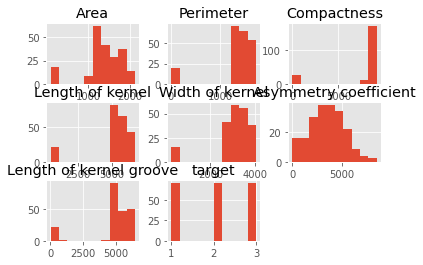



Histogram generation successful!


In [ ]:
data.hist()
plt.show()
print('\n\nHistogram generation successful!')

<h1 style="color:red;">PREGUNTA 1: ANÁLISIS DE DATOS</h1>

**Describa el conjunto de datos. Comó usted describe la distribución de los datos? Cuantos datos diferentes puede visualizar en el conjunto de datos? El histograma debe ser visible en el cuaderno de trabajo (notebook).**

se puede apreciar distintos puntos de incendios, es un distribucion uniforme en cada grafico.son 6 datos que tienen variacion de 5 a 4 por rango, tambien mediante la tabla se puede ver que en el año 1997 hubo mas incendios intencionales, natural y desconocida y en el año 1996 hubo una mayor  negligencia en los incendios.

In [ ]:
def sede_a(s):
    if s=="Cowuimbo":
        return 1
    elif s =="Masculino":
        return 2
    else:
        return 3
data['SEDE_O'].as_category()

data['SEDE_O']=data.apply(lambda x: sede_a(x['SEDE_O']), axis=1);
data.head()

,incendio_anio,incendio_total_numero,incendio_negligencia_numero,incendio_intencional_numero,incendio_natural_numero,incendio_desconocida_numero
0,1993,1,0,0,0,0
1,1994,2,29,0,0,9
2,1995,1,3,0,0,8
3,1996,3,57,2,2,1
4,1997,3,16,80,4,14


<h1 style="color:red;">PREGUNTA 2: Rango de Datos</h1>

**Basados en el código anterior, se selecciona un número de categorías para la variable incendio total. Considera que esas categorías describen la distribución de datos? Sugeriría otra distribución de categorías? Por qué se debe convertir a un número de categorías y no usar los datos de manera numérica?.**

si la describen y con el pasar de los años hubieron mas incendios. si, encuentro que esa distribucion de datos numericass es mas facil para el entendimiento de forma general, ya que es mas facil inferir al ver los numeros.las categorias ssegregan la informacion de forma mas ordenada y asi no se porduce un desorden.


In [ ]:
# Creamos el modelo
y = data['target']
x = data.drop(['target'], axis=1).values 
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

# Model 1: Árbol de decisión



In [ ]:
accuracies = list()
depth_range = range(1, 6)

# Testearemos la profundidad de 1 hasta 5
for depth in depth_range:
    fold_accuracy = []
    tree_model = tree.DecisionTreeClassifier(random_state=0, max_depth= depth)
   
    model = tree_model.fit(X_train, y_train) 
    valid_acc = model.score(X_test, y_test) # calculamos la precision con el segmento de validacion
    fold_accuracy.append(valid_acc)

    avg = sum(fold_accuracy)/len(fold_accuracy)
    accuracies.append(avg)
    
# Mostramos los resultados obtenidos
df = pd.DataFrame({"Max Prof": depth_range, "Precision": accuracies})
df = df[["Max Prof", "Precision"]]
print(df.to_string(index=False))

 Max Prof  Precision
        1   0.584906
        2   0.830189
        3   0.867925
        4   0.849057
        5   0.886792


<h1 style="color:red;">PREGUNTA 3: COMPORTAMIENTO DEL MODELO DE ÁRBOL DE DECISIÓN</h1>

**Compare los resultados obtenidos del modelo en cuanto a la precisión (Average Accuracy). Cómo es el comportamiento de cada uno de los modelos de acuerdo a su profundidad?. Puede usted intuir cuál modelo proporciona el mejor resultado y el por qué del mismo? Qué tiene que ver con los datos?, podría elegir otro parámetro diferente del sexo para predecir en este modelo? por qué?**

en los ultimos 3 max prof hay un precision que identica ,el max prof 1 es mas precision mas alta en el max. prof 2 es la precision mas baja de los 5. yo creo que los 3 ultimos años serian los mejor resultados ya que mantienen un numero constante de precision.

# Model 2: K-NN

In [ ]:
accuracies = list()
nn = range(1, 10)

# Testearemos cada vecindad de 1 a 9
for n_neighbors in nn:
    fold_accuracy = []
    knn = KNeighborsClassifier(n_neighbors)
    
    model = knn.fit(X_train, y_train) 
    valid_acc = model.score(X_test, y_test) # calculamos la precision con el segmento de validacion
    fold_accuracy.append(valid_acc)

    avg = sum(fold_accuracy)/len(fold_accuracy)
    accuracies.append(avg)
    
# Mostramos los resultados obtenidos
df = pd.DataFrame({"Vecinos": nn, "Precision": accuracies})
df = df[["Vecinos", "Precision"]]
print(df.to_string(index=False))


print('\n\nModelo creado satisfactoriamente!')

 Vecinos  Precision
       1   0.811321
       2   0.735849
       3   0.716981
       4   0.773585
       5   0.811321
       6   0.792453
       7   0.773585
       8   0.735849
       9   0.754717


Modelo creado satisfactoriamente!


<h1 style="color:red;">PREGUNTA 4: COMPORTAMIENTO DEL MODELO K-NN</h1>

**Compare los resultados obtenidos del modelo en cuanto a la precisión (Average Accuracy). Cómo es el comportamiento de cada uno de los modelos de acuerdo a la vecindad?. Puede usted intuir cuál modelo proporciona el mejor resultado y el por qué del mismo? Qué tiene que ver con los datos?, podría elegir otro parámetro diferente del sexo para predecir en este modelo? por qué?**

la precision de la vecindad 1,2 3 es la identica, al igual que en la vecindad 5,6,8,9 que es identica pero menor con respecto a las 3 mencionada anteriormente. yo encuentro que el mejor modelo de K-NN precision serian lso 3 primeros, ya que se mantendria mejor en el tiempo y no habria cambios , mientras que en las demas vecindades es un poco brusco el cambio con mucho alto y bajos.

# Comparación de los modelos

Seleccione `dep_max` de acuerdo a lo que obtuvieron en la pregunta 2 o el `n_neighbors` de acuerdo a la pregunta 3

**Primero defina el número y ejecute el modelo del árbol de decisión**

In [ ]:
# Creamos el modelo
y = data['target']
x = data.drop(['target'], axis=1).values 
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.35, random_state=42)


In [ ]:
# Crear Árbol de decision con la profundidad que eligió como la mejor
dep_max=3     #aquí se coloca el número de profundidad que usted eligió
decision_tree = tree.DecisionTreeClassifier(random_state=0, max_depth= dep_max)
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

**Segundo defina el número de vecinos que usted seleccionó de acuerdo a la pregunta 3 y ejecute el modelo K-NN**

In [ ]:
#Primero coloque el número de vecinos que seleccionó
n_neighbors=5    # aquí coloca el número de vecinos de acuerdo a su decisión en la pregunta 3

X=X_train
y=y_train

# we create an instance of Neighbours Classifier and fit the data.
clf = KNeighborsClassifier(n_neighbors, weights='distance')
clf.fit(X, y)



KNeighborsClassifier(weights='distance')

In [ ]:
pred = clf.predict(X_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))



[[17  2  6]
 [ 3 19  3]
 [ 3  1 20]]
              precision    recall  f1-score   support

           1       0.74      0.68      0.71        25
           2       0.86      0.76      0.81        25
           3       0.69      0.83      0.75        24

    accuracy                           0.76        74
   macro avg       0.76      0.76      0.76        74
weighted avg       0.77      0.76      0.76        74



In [ ]:
pred1 = decision_tree.predict(X_test)
print(confusion_matrix(y_test, pred1))
print(classification_report(y_test, pred1))

[[20  3  2]
 [ 2 23  0]
 [ 7  0 17]]
              precision    recall  f1-score   support

           1       0.69      0.80      0.74        25
           2       0.88      0.92      0.90        25
           3       0.89      0.71      0.79        24

    accuracy                           0.81        74
   macro avg       0.82      0.81      0.81        74
weighted avg       0.82      0.81      0.81        74



<h1 style="color:red;">PREGUNTA 5: COMPARACIÓN DE LOS MODELOS</h1>

**Usted selecciono un valor para la profundidad del árbol de decisión y la vencidad para K-NN. Cuando usted ejecuto los códigos con los números elegidos. Usted noto algún cambio en la precisión?, Por qué ocurrió esto? Cree usted que el modelo de árbol de decisión funciona mejor o peor que el modelo K-NN? Por qué?, base su respuesta en los resultados obtenidos de la predicción de ambos modelos**

creo que el mejor modelo seria el K-NN porque presenta mejor precision en los 3 primeros numeros, mientras que el modelo del arbol de precision tambien posee los 3 ultimos numeros identicos pero con menor precision

<hr>

Gran Trabajo! Ahora, Asegurese de hacerlo llegar **apropiadamente**